In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import uproot
import numpy as np

In [2]:
dfsData = []
dfsDataLite = []
with uproot.open('/home/mdicosta/LocalTestsO2/dplustree/mcgen/AO2D.root') as f:
    print(f.keys())
    for iKey, key in enumerate(f.keys()):
        if 'O2hfcanddpfullp' in key:
            print(key)
            dfData = f[key].arrays(library='pd')
            dfsData.append(dfData)

full_df = pd.concat([df for df in dfsData], ignore_index=True)
print(f"len(full_df): {len(full_df)}")

['DF_2261906130553975;1', 'DF_2261906130553975/O2hfcanddpfullp;1', 'DF_2261906130553975/O2hfcanddplite;1', 'DF_2261906130554103;1', 'DF_2261906130554103/O2hfcanddpfullp;1', 'DF_2261906130554103/O2hfcanddplite;1', 'DF_2261906130554231;1', 'DF_2261906130554231/O2hfcanddpfullp;1', 'DF_2261906130554231/O2hfcanddplite;1', 'DF_2261906130554359;1', 'DF_2261906130554359/O2hfcanddpfullp;1', 'DF_2261906130554359/O2hfcanddplite;1', 'DF_2261906130554487;1', 'DF_2261906130554487/O2hfcanddpfullp;1', 'DF_2261906130554487/O2hfcanddplite;1', 'DF_2261906080643575;1', 'DF_2261906080643575/O2hfcanddpfullp;1', 'DF_2261906080643575/O2hfcanddplite;1', 'DF_2261906080643703;1', 'DF_2261906080643703/O2hfcanddpfullp;1', 'DF_2261906080643703/O2hfcanddplite;1', 'DF_2261906080643831;1', 'DF_2261906080643831/O2hfcanddpfullp;1', 'DF_2261906080643831/O2hfcanddplite;1', 'DF_2261906080643959;1', 'DF_2261906080643959/O2hfcanddpfullp;1', 'DF_2261906080643959/O2hfcanddplite;1', 'DF_2261906080644087;1', 'DF_2261906080644087

In [3]:
print(full_df.columns)

Index(['fIndexBCs', 'fPt', 'fEta', 'fPhi', 'fY', 'fFlagMcMatchRec',
       'fOriginMcGen'],
      dtype='object')


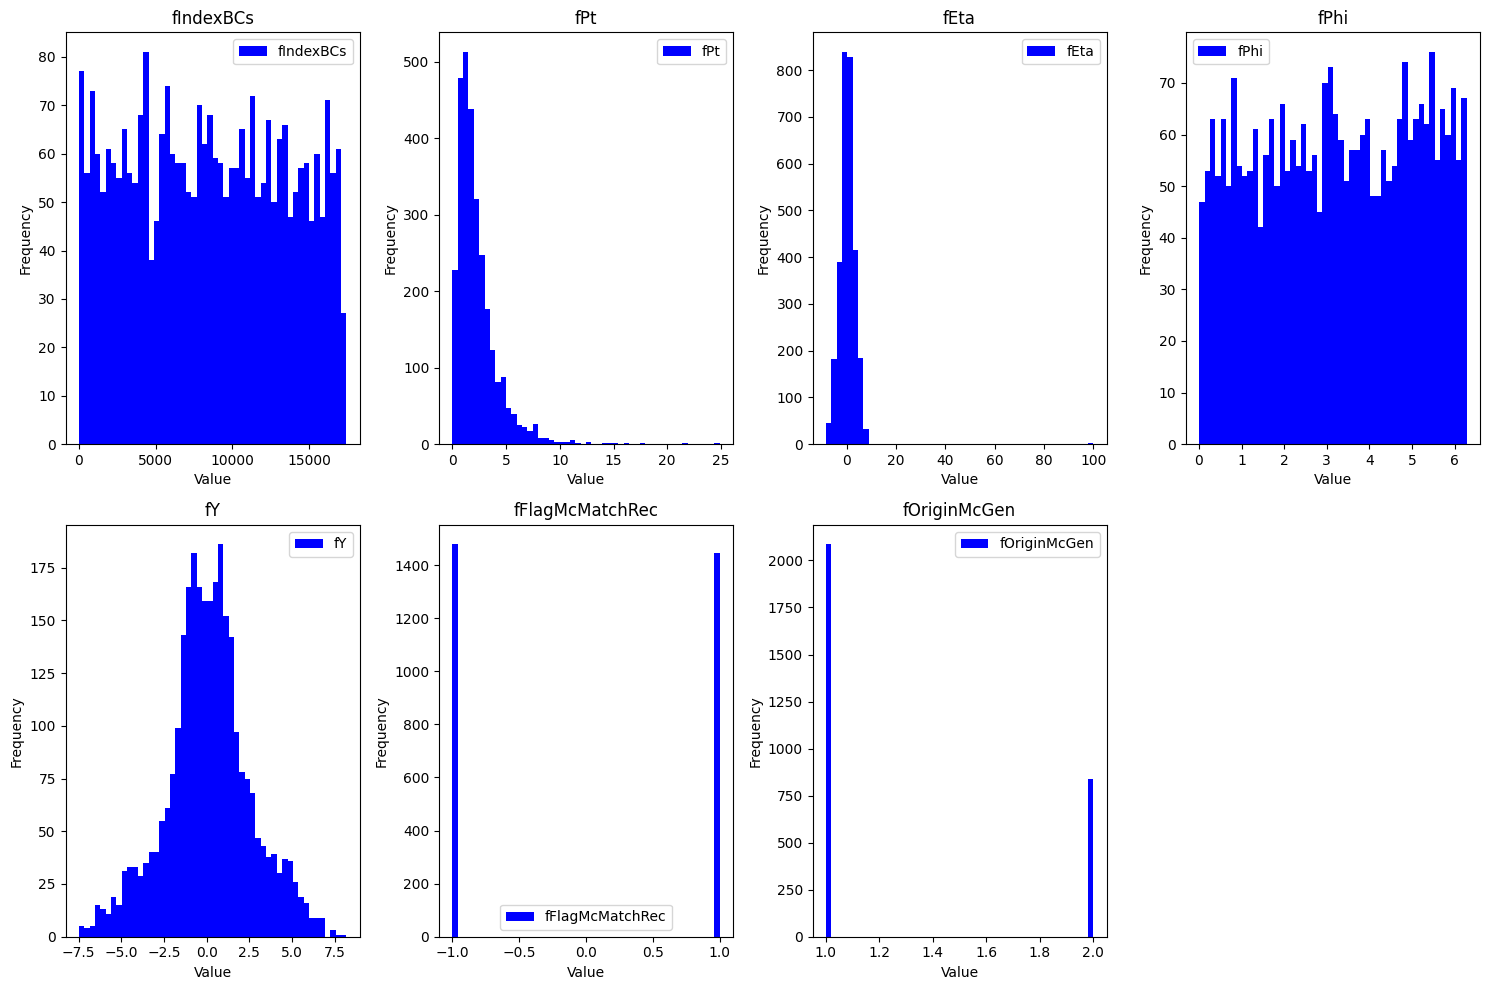

In [4]:
n_columns = len(full_df.columns)
n_rows = (n_columns // 4) + (1 if n_columns % 4 else 0)

fig, axes = plt.subplots(n_rows, 4, figsize=(15, 5 * n_rows))
axes = axes.flatten()

for i, column in enumerate(full_df.columns):
    data = full_df[column]
    finite_data = data[np.isfinite(data)]  # Filter out NaN and inf

    if len(finite_data) == 0:
        axes[i].set_visible(False)
        continue

    axes[i].hist(finite_data, bins=50, color='blue')
    axes[i].set_title(f'{column}')
    axes[i].set_xlabel('Value')
    axes[i].set_ylabel('Frequency')
    axes[i].legend([column])

# Hide any unused axes
for i in range(n_columns, len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()
